In [82]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import sklearn.preprocessing 
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import missingno
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from scipy.stats import uniform, randint
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
data.skew().sort_values(ascending=False)

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
OverallCond       0.693067
TotRmsAbvGrd      0.676341
HalfBath          0.675897
Fireplaces        0.649565
BsmtFullBath      0.596067
OverallQual       0.216944
MoSold            0.212053
BedroomAbvGr      0.211790
GarageArea        0.179981
YrSold            0.096269
FullBath          0.036562
Id                0.000000
GarageCars       -0.342549
YearRemodAdd     -0.503562
YearBuilt        -0.613461
G

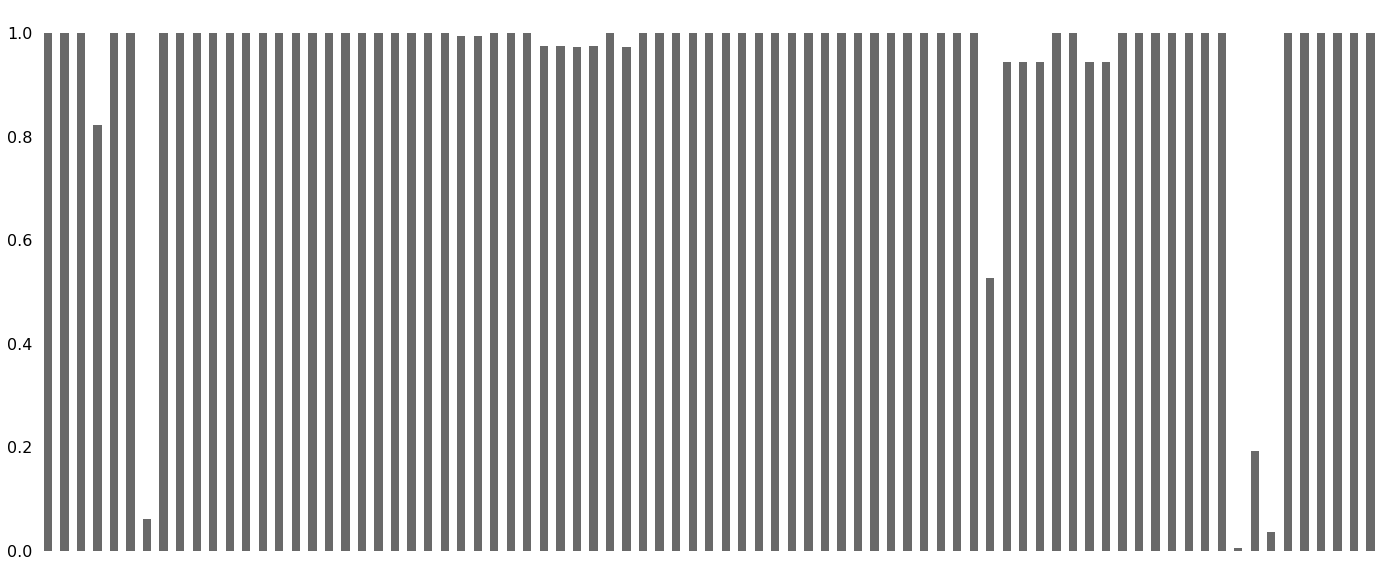

In [86]:
missingno.bar(data)

In [142]:
# Null Values and their Percentages
null_value_train = pd.DataFrame(data.isnull().sum()).reset_index()
null_value_train = null_value_train.rename(columns = {'index': 'Column Name', 0: 'Number of Null Values'}, inplace = False)
null_value_train['Percentage of Null Values'] = (null_value_train['Number of Null Values']/len(data)*100) 
null_value_train.sort_values(by = 'Percentage of Null Values', ascending = False).head(20)

,Column Name,Number of Null Values,Percentage of Null Values
0,MSSubClass,0,0.0
45,BsmtHalfBath,0,0.0
51,TotRmsAbvGrd,0,0.0
50,KitchenQual,0,0.0
49,KitchenAbvGr,0,0.0
48,BedroomAbvGr,0,0.0
47,HalfBath,0,0.0
46,FullBath,0,0.0
44,BsmtFullBath,0,0.0
53,Fireplaces,0,0.0


In [ ]:
# Houses in similar area will have same Lot Frontage, Masonry veneer area and Masonry type
## Replacing them with median 

train_data['LotFrontage'] = train_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

train_data['MasVnrType'] = train_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

train_data['MasVnrArea'] = train_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [88]:
# Drop 0 variance cols: Id
# and features with a lot of missing values 
data.drop(columns=['Alley','Fence','PoolQC','MiscFeature','FireplaceQu','Id'], inplace=True)

True

x_columns  =  train_set.columns

## creating function to get model statistics
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = train_set[x_columns]
    results = sm.OLS(y, x.astype(float)).fit()
    print(results.summary())
    return results.summary()
stats =  get_stats()

rawCols = 'YearRemodAdd    BsmtFinSF1     BsmtUnfSF     TotalBsmtSF    LowQualFinSF BsmtHalfBath    FullBath       HalfBath       GarageYrBlt    GarageArea      OpenPorchSF    EnclosedPorch   3SsnPorch       PoolArea       MiscVal  Utilities LotConfig       Condition1 MoSold         Condition2    BldgType      HouseStyle     Exterior1st  Exterior2nd     Foundation     BsmtFinType1   BsmtFinType1    CentralAir     Electrical      GarageFinish   GarageQual     PavedDrive     SaleType      '
newCols=[e for e in rawCols.split(" ") if e !=""]
train_set[newCols]

Coefficients having p-values less than alpha are statistically significant. For example, if you chose alpha to be 0.05, coefficients having a p-value of 0.05 or less would be statistically significant (i.e., you can reject the null hypothesis and say that the coefficient is significantly different from 0).”

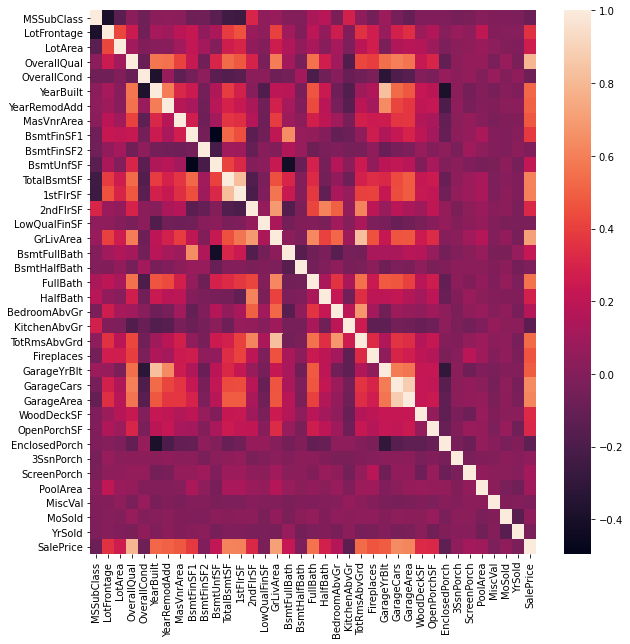

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr());

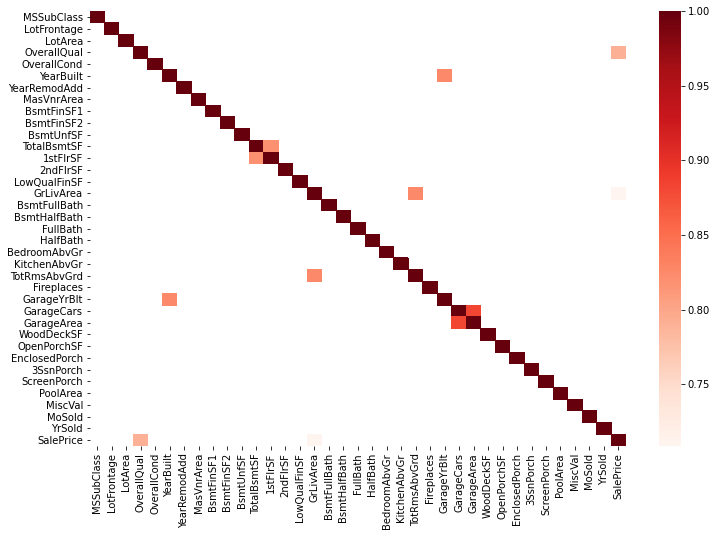

In [90]:
corr = data.corr()
kot = corr[np.abs(corr)>=0.7]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Reds")

In [91]:
## Drop correlated features
data.drop(columns=['GarageArea','GrLivArea','GarageYrBlt'], inplace=True)

In [131]:
from scipy.stats import skew, boxcox_normmax, norm

In [133]:
from scipy import stats 

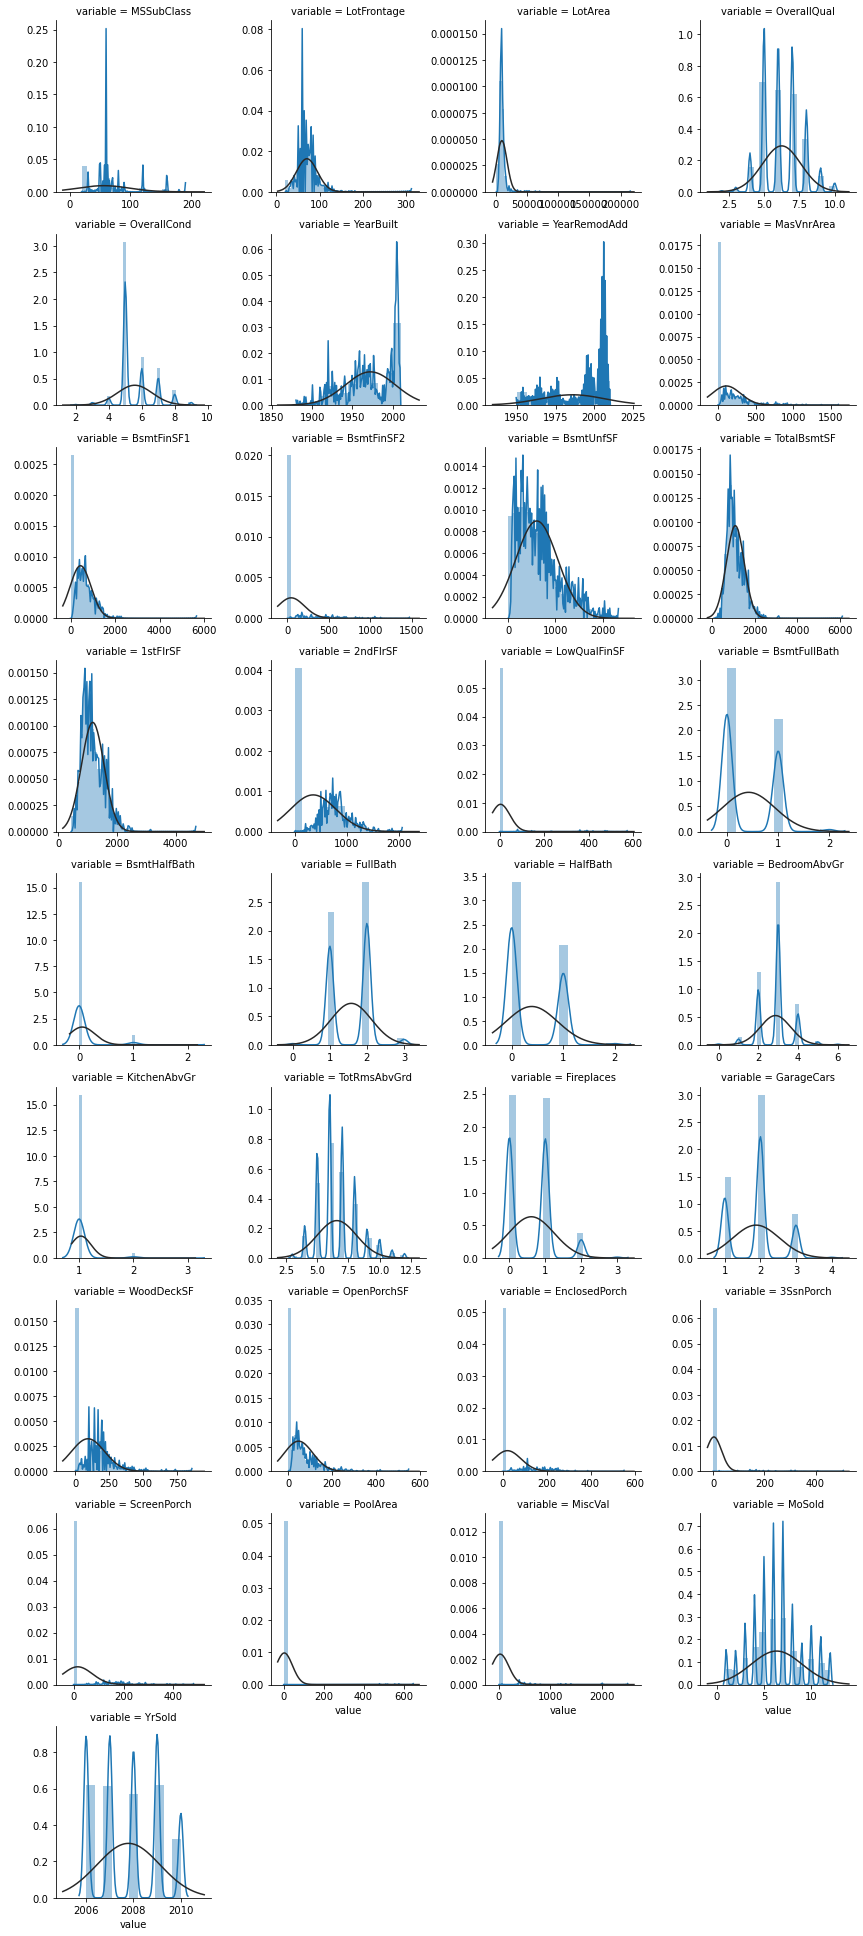

In [140]:
# Histogram to display skewness of every numeric variable
f = pd.melt(data, value_vars = newdf_num.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g.map(lambda _x, **kwargs: sns.distplot(_x, fit = norm, kde_kws={'bw': 0.1}), 'value');

## No variable is normally distributed, but LotFrontage, 1stFlrSF, GrLivArea, LotArea can be transformed using log.

In [92]:
## remove NaN values 
data.dropna(how='any', inplace=True)

In [93]:
y = data.SalePrice
data.drop(columns=['SalePrice'], inplace=True)

In [94]:
def get_num_cat_features(type_features, data):
    return data.select_dtypes(include=type_features)

## Get the numerical features
numerics = ['int64','float64']
newdf_num = get_num_cat_features(numerics, data)

## Get the categorical features
newdf_cat = data.select_dtypes(['object'])


All values are nominal, Label encoder will be used

****Ordinal Encoder**** /
***hidden***

In [95]:
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

## Get the categorical features
test.drop(columns=['Id','Alley','Fence','PoolQC','MiscFeature','FireplaceQu'], inplace= True)
test.drop(columns=['GarageArea','GrLivArea','GarageYrBlt'], inplace=True)
test.fillna(test.mean())
#test.dropna(inplace= True)

## Get the numerical features
numericstest = ['int64','float64']
newdf_numtest = get_num_cat_features(numerics, test)

test_num = get_num_cat_features(numerics, test)

newdf_cattest = test.select_dtypes(['object'])

trainTest = newdf_cat.append(newdf_cattest)

In [96]:
## First test of encoding labels:
def encode_labels(data):
    encoded_categoric_train_set = data.copy()
    
    for c in data.columns:
        data[c]= data[c].astype('category')
        encoded_categoric_train_set[c] = data[c].cat.codes
    return encoded_categoric_train_set

encoded_categoric_train_set = encode_labels(trainTest)

newdf_cat = encoded_categoric_train_set[:1094]
test = encoded_categoric_train_set[1094:]


In [118]:
scaler = sklearn.preprocessing.StandardScaler()
scaled_numeric_train_set = scaler.fit_transform(newdf_num)

In [119]:
encoded_categoric_train_set = encoded_categoric_train_set[:1094]

In [120]:
numeric_train_set_df = pd.DataFrame(scaled_numeric_train_set, columns=newdf_num.columns)
## Merge numercial and catgorical data
train_set = pd.DataFrame(pd.merge(numeric_train_set_df,
                 encoded_categoric_train_set[encoded_categoric_train_set.columns], on= numeric_train_set_df.index))
train_set= train_set.drop(columns=['key_0'])

In [121]:
y = y.values.reshape(-1,1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [122]:
### SELET STATISTICALLY MOST RELEVANT DATA
## 
x_columns = train_set.columns
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = train_set[x_columns]
    results = sm.OLS(y, x.astype(float)).fit()
    print(results.summary())
get_stats()


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              539.3
Date:                Fri, 03 Sep 2021   Prob (F-statistic):                        0.00
Time:                        16:51:26   Log-Likelihood:                         -12951.
No. Observations:                1094   AIC:                                  2.604e+04
Df Residuals:                    1025   BIC:                                  2.639e+04
Df Model:                          69                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

rawCols = 'YearRemodAdd    BsmtFinSF1     BsmtUnfSF     TotalBsmtSF    LowQualFinSF BsmtHalfBath    FullBath       HalfBath       GarageYrBlt    GarageArea      OpenPorchSF    EnclosedPorch   3SsnPorch       PoolArea       MiscVal  Utilities LotConfig       Condition1 MoSold         Condition2    BldgType      HouseStyle     Exterior1st  Exterior2nd     Foundation     BsmtFinType1   BsmtFinType1    CentralAir     Electrical      GarageFinish   GarageQual     PavedDrive     SaleType      '
newCols=[e for e in rawCols.split(" ") if e !=""]
validCols = [e for e in train_set.columns if e not in newCols]
X = train_set[validCols]

In [123]:
X = train_set

In [124]:
X.shape

(1094, 71)

clf = RandomForestRegressor(max_features='auto', n_estimators=100, random_state=42, bootstrap=False)
scores=cross_val_score(clf, train_set, y, cv=5)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
clf.fit(train_set,y)

In [104]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [105]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [109]:
X.shape

(1094, 41)

In [125]:


xgb_model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "importance_type": ['weight', 'gain', 'cover'],
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4),
    "num_parallel_tree" :  randint(1, 5),
    "reg_lambda":  randint(0, 5),
    "reg_alpha":  randint(0, 5),
    
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)
xgb_model.fit(X, y)

y_pred = xgb_model.predict(X)

mse=mean_squared_error(y, y_pred)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  3.0min finished


Model with rank: 1
Mean validation score: 0.880 (std: 0.028)
Parameters: {'colsample_bytree': 0.8623889005903211, 'gamma': 0.3545302597254582, 'importance_type': 'gain', 'learning_rate': 0.21759139806418434, 'max_depth': 5, 'n_estimators': 146, 'num_parallel_tree': 3, 'reg_alpha': 2, 'reg_lambda': 3, 'subsample': 0.8212005810367834}



In [ ]:
xgb_model.get_xgb_params

In [ ]:
search.predict

In [ ]:
y_pred

In [ ]:
plt.plot(y,y_pred)

In [126]:
#encoded_categoric_test_set_trs =  categoric_test_set.apply(enc.transform) 
encoded_categoric_test_set = test


scaled_numeric_test_set = scaler.transform(test_num[newdf_num.columns])

numeric_test_set_df = pd.DataFrame(scaled_numeric_test_set, columns=newdf_num.columns)
## Merge numercial and catgorical data
test_set = pd.DataFrame(pd.merge(numeric_test_set_df,
                 test[test.columns], on= numeric_test_set_df.index))
test_set.drop(columns=['key_0'], inplace=True)
test_set.fillna(test_set.mean(), inplace=True)
Xtest = test_set[validCols]


In [127]:
Xtest = test_set[X.columns]

In [128]:
y_predict = search.predict(Xtest)

In [129]:
sample_submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

output = pd.DataFrame({'Id': sample_submission.Id,
'SalePrice': y_predict})
output.to_csv('submissionGB12tdScaler.csv', index=False)